<a href="https://colab.research.google.com/github/mohit816/m1234/blob/master/Mohit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
#Unzip the File
!unzip '0753aae4bec411eb.zip'

Archive:  0753aae4bec411eb.zip
replace sample submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [94]:
#Importing packages
import numpy as np
import pandas as pd


In [95]:
#Reading csv files of dataset
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [ ]:
train.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,12,2009,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,2018,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,6,2015,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,6,2015,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,2,2019,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [ ]:
train.shape

(13645, 22)

In [ ]:
test.shape

(8745, 20)

In [ ]:
#Exploratory data Analysis
train.describe()

,EmpID,Age,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent
count,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000
mean,13150.781239,30.691242,7.100257,6.547746,2014.452254,18.076951,25.061488,3.392085,11.967021,75.880093
std,6475.019626,3.881378,1.346539,3.426920,3.426920,7.208130,7.478119,1.044676,4.897836,14.894207
min,2001.000000,24.000000,4.000000,1.000000,2009.000000,6.000000,10.000000,1.000000,4.000000,33.530000
25%,7501.000000,28.000000,6.000000,4.000000,2012.000000,12.000000,19.000000,3.000000,8.000000,68.720000
50%,13173.000000,31.000000,7.000000,7.000000,2014.000000,18.000000,25.000000,3.000000,12.000000,78.110000
75%,18718.000000,34.000000,8.000000,9.000000,2017.000000,24.000000,31.000000,4.000000,16.000000,87.990000
max,24390.000000,42.000000,10.000000,12.000000,2020.000000,30.000000,40.000000,5.000000,20.000000,95.500000


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


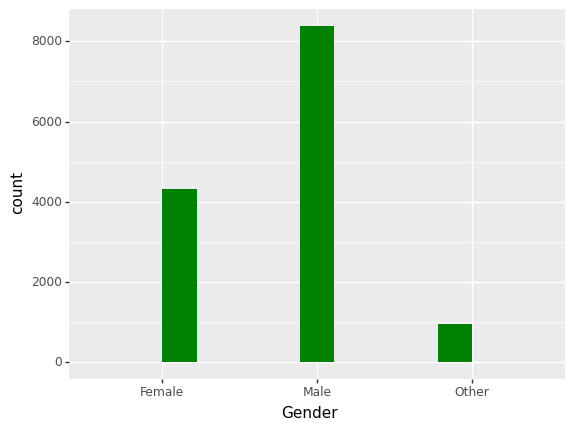

<ggplot: (8794393616305)>

In [90]:
#Data Visualization of features
ggplot() + geom_bar(aes(x="Gender"), data=train, stat='bin', bins=10.0,fill="green")

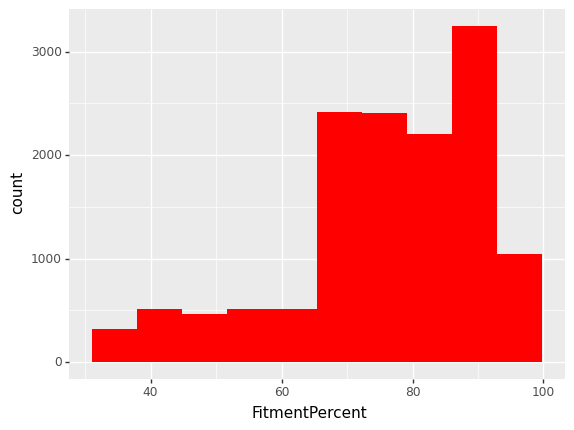

<ggplot: (8794392000113)>

In [89]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LinearRegression

ggplot() + geom_bar(aes(x="FitmentPercent"), data=train, stat='bin', bins=10.0,fill="red")

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


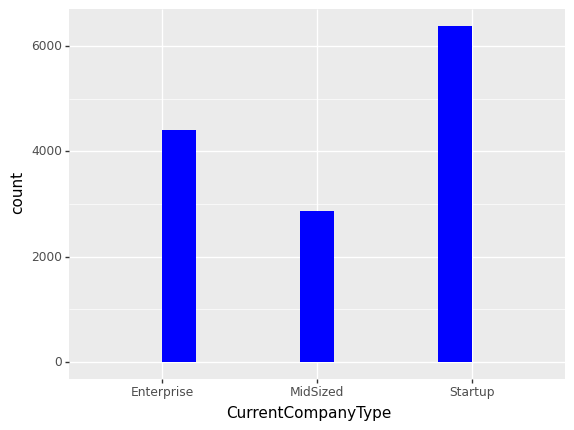

<ggplot: (8794392009609)>

In [88]:
ggplot() + geom_bar(aes(x="CurrentCompanyType"), data=train, stat='bin', bins=10.0,fill="blue")

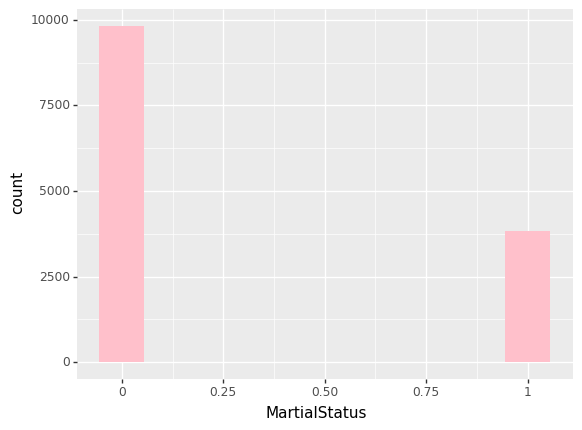

<ggplot: (8794391264309)>

In [140]:
ggplot() + geom_bar(aes(x="MartialStatus"), data=train, stat='bin', bins=10.0,fill="pink")

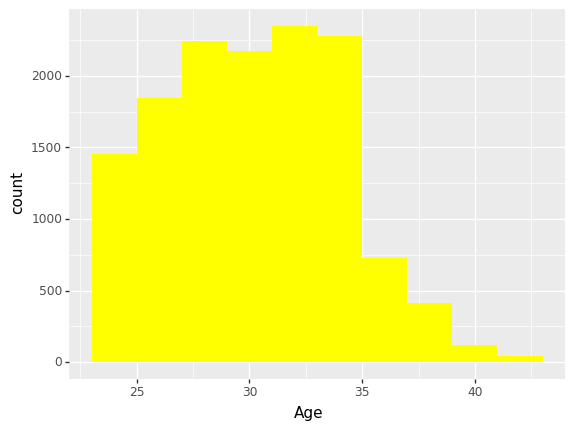

<ggplot: (8794391226097)>

In [141]:
ggplot() + geom_bar(aes(x="Age"), data=train, stat='bin', bins=10.0,fill="yellow")

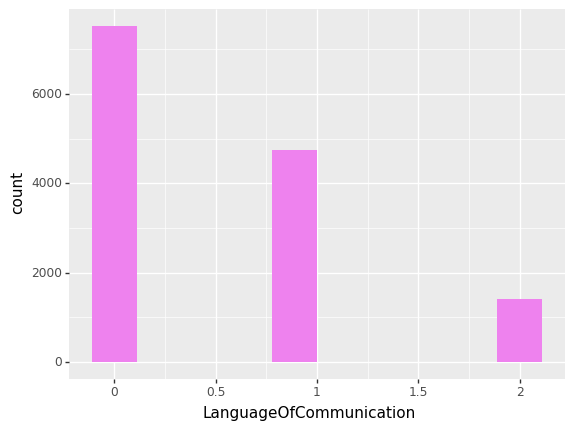

<ggplot: (8794391224401)>

In [142]:
ggplot() + geom_bar(aes(x="LanguageOfCommunication"), data=train, stat='bin', bins=10.0,fill="violet")

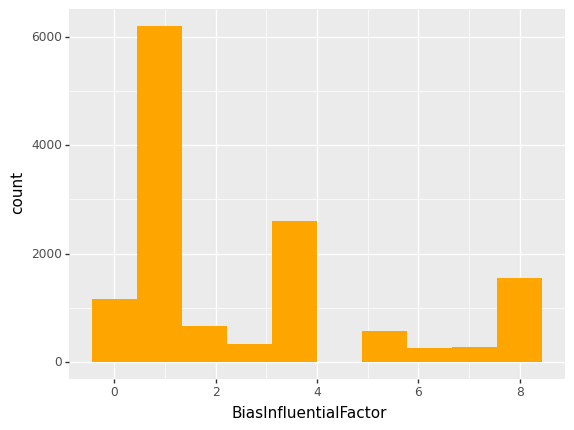

<ggplot: (8794391196113)>

In [143]:
ggplot() + geom_bar(aes(x="BiasInfluentialFactor"), data=train, stat='bin', bins=10.0,fill="orange")

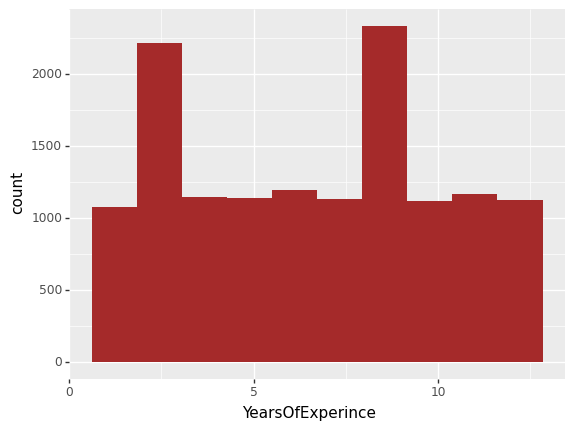

<ggplot: (8794391068997)>

In [148]:
ggplot() + geom_bar(aes(x="YearsOfExperince"), data=train, stat='bin', bins=10.0,fill="brown")

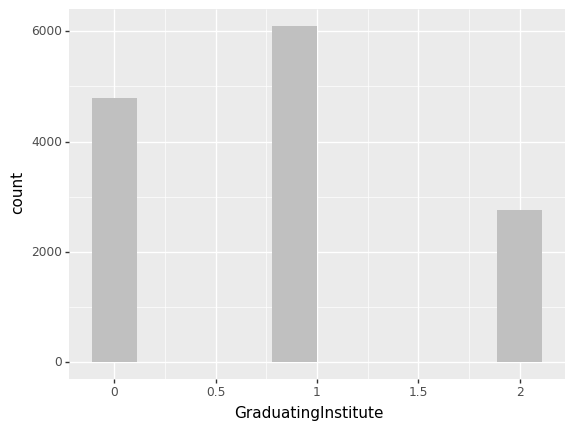

<ggplot: (8794390986001)>

In [151]:
ggplot() + geom_bar(aes(x="GraduatingInstitute"), data=train, stat='bin', bins=10.0,fill="silver")

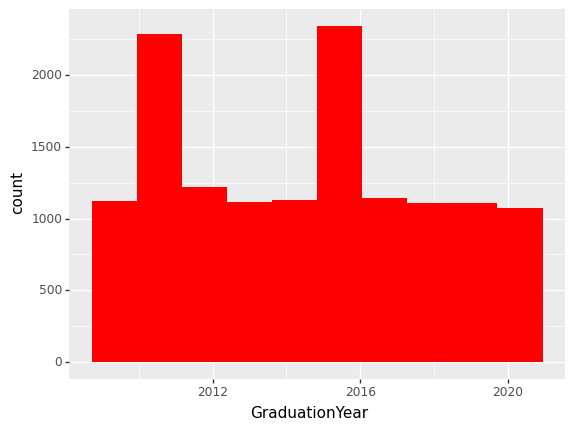

<ggplot: (8794390988985)>

In [152]:
ggplot() + geom_bar(aes(x="GraduationYear"), data=train, stat='bin', bins=10.0,fill="red")

In [ ]:
#Merge Train and Test data 
df = pd.concat([train,test],axis=0,sort=True)
df

,Age,BiasInfluentialFactor,CurrentCTC,CurrentCompanyType,CurrentDesignation,DegreeBranch,DepartmentInCompany,EmpID,EmpName,EmpScore,ExpectedCTC,FitmentPercent,Gender,GraduatingInstitute,GraduationYear,HighestDegree,JobProfileIDApplyingFor,LanguageOfCommunication,LatestDegreeCGPA,MartialStatus,TotalLeavesTaken,YearsOfExperince
0,35,YearsOfExperince,21,Enterprise,SSE,Electrical,Design,11041,John,5,26,95.40,Male,Tier 1,2009,B.Tech,JR85289,English,7,Married,20,12
1,26,NaN,15,MidSized,BA,Artificial Intelligence,Engineering,15079,William,5,19,67.09,Male,Tier 3,2018,B.Tech,JR87525,English,7,Married,6,3
2,36,Gender,15,MidSized,SDE,Computer Science,Engineering,18638,James,5,24,91.26,Female,Tier 1,2015,PhD,JR87525,English,6,Single,19,6
3,29,Gender,16,Startup,SDE,Information Technology,Product,3941,Charles,5,24,72.29,Female,Tier 2,2015,BCA,JR87525,English,5,Married,16,6
4,25,DegreeBranch,24,Enterprise,SDE,Computer Science,Engineering,5936,George,5,32,86.34,Male,Tier 3,2019,Dual M.Tech,JR70175,English,8,Married,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,26,NaN,29,Startup,SDE,Computer Science,Design,14758,Matt,5,38,NaN,Female,Tier 1,2018,B.Tech,JR85289,English,10,Married,10,3
8741,27,NaN,18,Startup,BA,Electrical,Design,23544,Salvatore,4,26,NaN,Male,Tier 1,2020,MS,JR85289,Hindi,10,Married,19,1
8742,27,NaN,7,Startup,SDE,Computer Science,Engineering,16175,Adrian,4,17,NaN,Male,Tier 2,2017,B.Tech,JR85289,English,7,Married,12,4
8743,33,NaN,8,Enterprise,SSE,Electrical and Electronics,Design,18458,Ambrose,4,18,NaN,Male,Tier 1,2014,MS,JR79193,English,7,Married,10,7


In [ ]:
#Importing important libraries and packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.preprocessing import
from sklearn.preprocessing import StandardScaler,LabelEncoder,MultiLabelBinarizer,LabelBinarizer
from sklearn.model_selection import train_test_split,cross_val_score


In [ ]:
#EmpName column is not going to really help in this model as name doesn't signify anything so i am dropping it.
df.drop(columns=['EmpName'],inplace=True)

In [96]:
train.apply(lambda x: sum(x.isnull()))

EmpID                         0
EmpName                       0
LanguageOfCommunication       0
Age                           0
Gender                        0
JobProfileIDApplyingFor       0
HighestDegree                 0
DegreeBranch                  0
GraduatingInstitute           0
LatestDegreeCGPA              0
YearsOfExperince              0
GraduationYear                0
CurrentCTC                    0
ExpectedCTC                   0
MartialStatus                 0
EmpScore                      0
CurrentDesignation            0
CurrentCompanyType            0
DepartmentInCompany           0
TotalLeavesTaken              0
BiasInfluentialFactor      3336
FitmentPercent                0
dtype: int64

In [97]:
train['BiasInfluentialFactor'].value_counts()

DegreeBranch          2858
Gender                2605
YearsOfExperince      1561
CurrentCompanyType    1174
EmpScore               659
HighestDegree          582
Ethinicity             328
MartialStatus          280
LatestDegreeCGPA       262
Name: BiasInfluentialFactor, dtype: int64

In [98]:
#BiasInfluentialFactor is a important feature and it has some missing values 
# Imputation of missing value with the largest number of values in the dataset i.e "Degree Branch"
train['BiasInfluentialFactor'].fillna('DegreeBranch',inplace=True)

In [99]:
train['BiasInfluentialFactor'].isna().sum()

0

In [100]:
train['BiasInfluentialFactor'].value_counts()

DegreeBranch          6194
Gender                2605
YearsOfExperince      1561
CurrentCompanyType    1174
EmpScore               659
HighestDegree          582
Ethinicity             328
MartialStatus          280
LatestDegreeCGPA       262
Name: BiasInfluentialFactor, dtype: int64

In [101]:
train['EmpScore'].value_counts()


3    5462
4    4184
5    2025
2    1064
1     910
Name: EmpScore, dtype: int64

In [102]:
train['CurrentDesignation'].value_counts()

SDE    5423
SSE    2745
DS     1716
BA     1710
EM     1342
SEM     287
DA      287
DE      135
Name: CurrentDesignation, dtype: int64

In [103]:
test.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,5,2016,27,34,Single,4,SDE,Enterprise,Finance,18
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,12,2009,29,33,Married,4,EM,Enterprise,Engineering,8
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,2,2019,18,25,Married,3,SDE,Startup,Engineering,18
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,11,2010,7,12,Single,5,DS,Enterprise,Product,17
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,6,2015,22,32,Married,4,SDE,Startup,Engineering,9


In [104]:
train['LanguageOfCommunication'].value_counts()

English    7510
Hindi      4733
Native     1402
Name: LanguageOfCommunication, dtype: int64

In [106]:
train['JobProfileIDApplyingFor'].value_counts()

JR85289    4697
JR87525    3416
JR88879    1231
JR89890    1157
JR88873    1123
JR81165     681
JR79193     678
JR88654     420
JR70175     242
Name: JobProfileIDApplyingFor, dtype: int64

In [105]:
train.dtypes

EmpID                        int64
EmpName                     object
LanguageOfCommunication     object
Age                          int64
Gender                      object
JobProfileIDApplyingFor     object
HighestDegree               object
DegreeBranch                object
GraduatingInstitute         object
LatestDegreeCGPA             int64
YearsOfExperince             int64
GraduationYear               int64
CurrentCTC                   int64
ExpectedCTC                  int64
MartialStatus               object
EmpScore                     int64
CurrentDesignation          object
CurrentCompanyType          object
DepartmentInCompany         object
TotalLeavesTaken             int64
BiasInfluentialFactor       object
FitmentPercent             float64
dtype: object

In [107]:
#Feature Engineering
#Label encoding of Categorical variables
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
train['Gender'] = number.fit_transform(train['Gender'].astype('str'))
test['Gender']= number.fit_transform(test['Gender'].astype('str'))

In [108]:
train['Gender'].value_counts()

1    8376
0    4326
2     943
Name: Gender, dtype: int64

In [109]:
train['LanguageOfCommunication']=number.fit_transform(train['LanguageOfCommunication'].astype('str'))
test['LanguageOfCommunication']=number.fit_transform(test['LanguageOfCommunication'].astype('str'))

In [110]:
test['LanguageOfCommunication'].value_counts()

0    4771
1    3088
2     886
Name: LanguageOfCommunication, dtype: int64

In [111]:
train['JobProfileIDApplyingFor'] = number.fit_transform(train['JobProfileIDApplyingFor'].astype('str'))
test['JobProfileIDApplyingFor']= number.fit_transform(test['JobProfileIDApplyingFor'].astype('str'))

In [112]:
train['JobProfileIDApplyingFor'].value_counts()

3    4697
4    3416
7    1231
8    1157
6    1123
2     681
1     678
5     420
0     242
Name: JobProfileIDApplyingFor, dtype: int64

In [113]:
train['HighestDegree'] = number.fit_transform(train['HighestDegree'].astype('str'))
test['HighestDegree']= number.fit_transform(test['HighestDegree'].astype('str'))

In [114]:
train['HighestDegree'].value_counts()

0    5619
4    2026
1    1634
6    1579
2    1358
3     665
7     624
5     140
Name: HighestDegree, dtype: int64

In [115]:
train['DegreeBranch'] = number.fit_transform(train['DegreeBranch'].astype('str'))
test['DegreeBranch']= number.fit_transform(test['DegreeBranch'].astype('str'))

In [116]:
train['DegreeBranch'].value_counts()

1    4749
5    2993
0    2001
2    1803
4    1699
3     400
Name: DegreeBranch, dtype: int64

In [117]:
train['GraduatingInstitute'] = number.fit_transform(train['GraduatingInstitute'].astype('str'))
test['GraduatingInstitute']= number.fit_transform(test['GraduatingInstitute'].astype('str'))

train['GraduatingInstitute'].value_counts()


1    6092
0    4793
2    2760
Name: GraduatingInstitute, dtype: int64

In [118]:
train['LatestDegreeCGPA'].value_counts()

7     4738
8     3480
6     1779
9     1554
5     1089
4      713
10     292
Name: LatestDegreeCGPA, dtype: int64

In [119]:
train['MartialStatus'].value_counts()

Married    9810
Single     3835
Name: MartialStatus, dtype: int64

In [120]:
train['MartialStatus'] = number.fit_transform(train['MartialStatus'].astype('str'))
test['MartialStatus']= number.fit_transform(test['MartialStatus'].astype('str'))

In [121]:
train['MartialStatus'].value_counts()

0    9810
1    3835
Name: MartialStatus, dtype: int64

In [122]:
train['CurrentDesignation'] = number.fit_transform(train['CurrentDesignation'].astype('str'))
test['CurrentDesignation']= number.fit_transform(test['CurrentDesignation'].astype('str'))

In [123]:
train['CurrentDesignation'].value_counts()

5    5423
7    2745
3    1716
0    1710
4    1342
6     287
1     287
2     135
Name: CurrentDesignation, dtype: int64

In [124]:
train['CurrentCompanyType'] = number.fit_transform(train['CurrentCompanyType'].astype('str'))
test['CurrentCompanyType']= number.fit_transform(test['CurrentCompanyType'].astype('str'))

In [125]:
train['CurrentCompanyType'].value_counts()

2    6373
0    4395
1    2877
Name: CurrentCompanyType, dtype: int64

In [126]:
train['DepartmentInCompany'].value_counts()

Engineering         5749
Design              4393
Customer Success    1570
Product             1232
Finance              701
Name: DepartmentInCompany, dtype: int64

In [127]:
train['DepartmentInCompany'] = number.fit_transform(train['DepartmentInCompany'].astype('str'))
test['DepartmentInCompany']= number.fit_transform(test['DepartmentInCompany'].astype('str'))

In [128]:
train['BiasInfluentialFactor']=number.fit_transform(train['BiasInfluentialFactor'].astype('str'))

In [129]:
train['BiasInfluentialFactor'].value_counts()
#0-CurrentCompanyType
#1-DegreeBranch
#2-EmpScore
#3-Ethinicity
#4-Gender
#5-HighestDegree
#6-LatestDegreeCGPA
#7-MartialStatus
#8-YearsOfExperience

1    6194
4    2605
8    1561
0    1174
2     659
5     582
3     328
7     280
6     262
Name: BiasInfluentialFactor, dtype: int64

In [130]:
train['TotalLeavesTaken'].value_counts()

11    861
6     856
13    842
4     827
12    818
20    812
14    802
19    802
10    794
18    792
9     792
8     792
5     787
15    781
17    773
16    762
7     752
Name: TotalLeavesTaken, dtype: int64

In [131]:
train.apply(lambda x: sum(x.isnull()))

EmpID                      0
EmpName                    0
LanguageOfCommunication    0
Age                        0
Gender                     0
JobProfileIDApplyingFor    0
HighestDegree              0
DegreeBranch               0
GraduatingInstitute        0
LatestDegreeCGPA           0
YearsOfExperince           0
GraduationYear             0
CurrentCTC                 0
ExpectedCTC                0
MartialStatus              0
EmpScore                   0
CurrentDesignation         0
CurrentCompanyType         0
DepartmentInCompany        0
TotalLeavesTaken           0
BiasInfluentialFactor      0
FitmentPercent             0
dtype: int64

In [132]:
#Importing some more libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


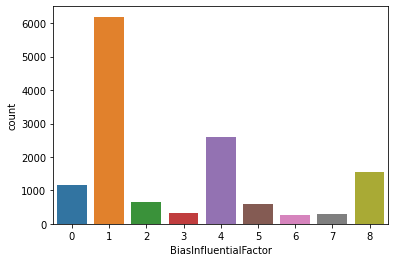

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(train['BiasInfluentialFactor'],label="Count")
plt.show()

In [134]:
train.dtypes
test.dtypes

EmpID                       int64
EmpName                    object
LanguageOfCommunication     int64
Age                         int64
Gender                      int64
JobProfileIDApplyingFor     int64
HighestDegree               int64
DegreeBranch                int64
GraduatingInstitute         int64
LatestDegreeCGPA            int64
YearsOfExperince            int64
GraduationYear              int64
CurrentCTC                  int64
ExpectedCTC                 int64
MartialStatus               int64
EmpScore                    int64
CurrentDesignation          int64
CurrentCompanyType          int64
DepartmentInCompany         int64
TotalLeavesTaken            int64
dtype: object

In [135]:
dependent_variable = 'FitmentPercent'
independent_variable = [x for x in train.columns if x not in ['EmpID','EmpName',dependent_variable]]


In [136]:
test.apply(lambda x: sum(x.isnull()))

EmpID                      0
EmpName                    0
LanguageOfCommunication    0
Age                        0
Gender                     0
JobProfileIDApplyingFor    0
HighestDegree              0
DegreeBranch               0
GraduatingInstitute        0
LatestDegreeCGPA           0
YearsOfExperince           0
GraduationYear             0
CurrentCTC                 0
ExpectedCTC                0
MartialStatus              0
EmpScore                   0
CurrentDesignation         0
CurrentCompanyType         0
DepartmentInCompany        0
TotalLeavesTaken           0
dtype: int64

In [ ]:
#Model:- RandomForestRegressor for Calculating FitmentPercent
from sklearn.ensemble import RandomForestRegressor

dependent_variable = 'FitmentPercent'
independent_variable = [x for x in train.columns if x not in ['EmpID','EmpName',dependent_variable,'BiasInfluentialFactor']]

model_03 = RandomForestRegressor(max_depth = 10, min_samples_leaf = 10, max_features= 'auto')

# Fit the algorithm
model_03.fit(train[independent_variable], train[dependent_variable])

# Model predictions
model_03_predictions = model_03.predict(test[independent_variable])


In [137]:
#Making a copy of test dataset
test1=pd.read_csv("Test.csv")
test1.shape

(8745, 20)

In [138]:
test1['FitmentPercent']=model_03_predictions
test1['FitmentPercent'].shape

(8745,)

In [139]:
test1.head()
test1['FitmentPercent'].value_counts()

90.083539    1
78.209109    1
81.795671    1
81.238614    1
90.612109    1
            ..
78.199401    1
54.732021    1
54.186604    1
81.594356    1
78.695462    1
Name: FitmentPercent, Length: 8745, dtype: int64

In [ ]:
test1.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,FitmentPercent,BiasInfluentialFactor
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,5,2016,27,34,Single,4,SDE,Enterprise,Finance,18,90.089858,1
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,12,2009,29,33,Married,4,EM,Enterprise,Engineering,8,90.606440,1
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,2,2019,18,25,Married,3,SDE,Startup,Engineering,18,80.702093,1
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,11,2010,7,12,Single,5,DS,Enterprise,Product,17,55.545985,1
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,6,2015,22,32,Married,4,SDE,Startup,Engineering,9,79.603257,4


In [ ]:
test1.shape

(8745, 22)

In [ ]:
# RandomForest Classifer Model for calculating Bias InfluentialFactor
from sklearn.ensemble import RandomForestClassifier

dependent_variable = 'BiasInfluentialFactor'
independent_variable = [x for x in train.columns if x not in ['EmpID','EmpName',dependent_variable,'FitmentPercent']]

model_031 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 10, max_features= 'auto')

# Fit the algorithm
model_031.fit(train[independent_variable], train[dependent_variable])

# Model predictions
model_031_predictions = model_031.predict(test[independent_variable])


In [ ]:
test1['BiasInfluentialFactor']=model_031_predictions

In [ ]:
test1['BiasInfluentialFactor'].value_counts()

1    5153
4    1916
8    1086
5     364
2     157
0      69
Name: BiasInfluentialFactor, dtype: int64

In [ ]:
test1['FitmentPercent'].head()


0    90.089858
1    90.606440
2    80.702093
3    55.545985
4    79.603257
Name: FitmentPercent, dtype: float64

In [ ]:
sample.head()

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,MaritalStatus,90.029168
1,23568,DegreeBranch,90.356092
2,21490,MartialStatus,80.994493
3,8363,HighestDegree,55.637235
4,6165,Gender,79.286901


In [ ]:
from google.colab import files
import pandas as pd
test1.to_csv('test2.csv')
files.download('test2.csv')